## Challenge 
[Click here pour plus de détails](https://www.kaggle.com/c/classification-data-challenge/data)

In [40]:
# import libs
import numpy as np
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [41]:
# extract data
#data = ZipFile("dataset.zip")
#data.extractall()

In [42]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_sub = pd.read_csv("submission.csv")
df_train.head()

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,6,23,1,2,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0


## description des variables

In [43]:
df_sub.describe()

,Id,Predicted
count,1715.000000,1715.0
mean,2926.630321,1.0
std,1674.099495,0.0
min,5.000000,1.0
25%,1473.500000,1.0
50%,2940.000000,1.0
75%,4353.000000,1.0
max,5821.000000,1.0


## selection des variables 

In [44]:
# train set
X = df_train.iloc[:,1:-1].values
ID = df_train.iloc[:,0].values
y = df_train.iloc[:,-1].values

# test set
X_pred = df_test.iloc[:,1:].values
ID_pred = df_test.iloc[:,0].values

ID_sub = df_sub.iloc[:,0].values
y_sub = df_sub.iloc[:,1].values

del df_train, df_test, df_sub

In [45]:
values, count = np.unique(y, return_counts=True)

Text(0, 0.5, '#Count')

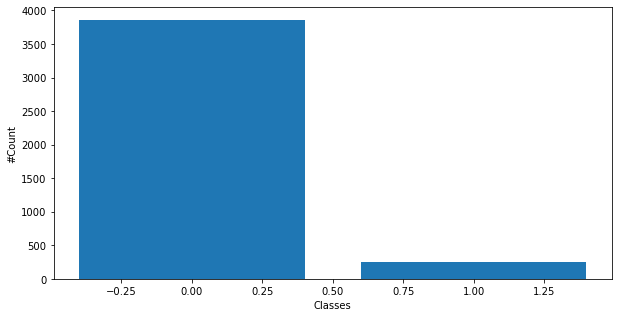

In [46]:
plt.figure(figsize=(10,5))
plt.bar(values, count)
plt.xlabel("Classes")
plt.ylabel("#Count")

In [47]:
print(">> Ratio de la classe 0 est %.2f " %(count.max()/count.sum()))
print(">> Ratio de la classe 1 est %.2f " %(count.min()/count.sum()))

>> Ratio de la classe 0 est 0.94 
>> Ratio de la classe 1 est 0.06 


### To Do : imbalanced dataset
Pour fixer ce probleme, il existe plusieurs méthodes pour améliorer les performances du modèle
Dans l'article de [Classification with Imbalanced Data - TDS](https://towardsdatascience.com/classification-with-imbalanced-data-f13ccb0496b3), l'auteur nous propose plusieurs approches pour aborder cette problématique:
- Oversampling  --> SMOTE
- Undersampling
- Combinaison de Oversampling et Undersampling
- Custom Filtering and Sampling


### 1 - Oversampling : SMOTE Method

In [48]:
from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
sm = SMOTE(sampling_strategy="minority" , random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)

Text(0, 0.5, '#Count')

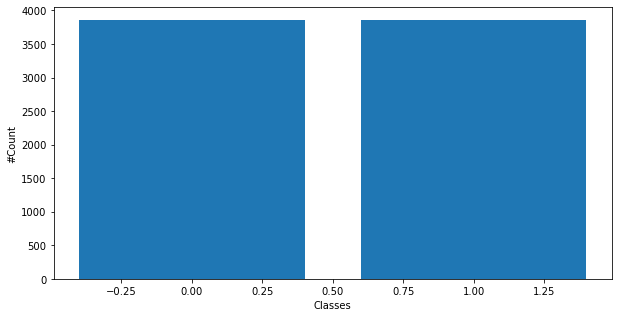

In [49]:
values, count = np.unique(y_smote, return_counts=True)
plt.figure(figsize=(10,5))
plt.bar(values, count)
plt.xlabel("Classes")
plt.ylabel("#Count")

In [50]:
print(">> Ratio de la classe 0 est %.2f " %(count.max()/count.sum()))
print(">> Ratio de la classe 1 est %.2f " %(count.min()/count.sum()))

>> Ratio de la classe 0 est 0.50 
>> Ratio de la classe 1 est 0.50 


### 2 - Undersampling : 

In [51]:
from imblearn.under_sampling import EditedNearestNeighbours

In [52]:
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X, y)

Text(0, 0.5, '#Count')

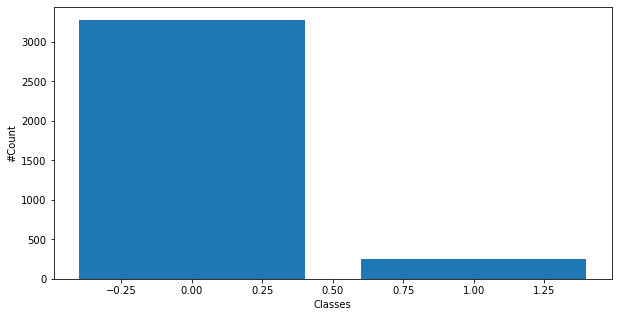

In [53]:
values, count = np.unique(y_enn, return_counts=True)
plt.figure(figsize=(10,5))
plt.bar(values, count)
plt.xlabel("Classes")
plt.ylabel("#Count")

In [54]:
print(">> Ratio de la classe 0 est %.2f " %(count.max()/count.sum()))
print(">> Ratio de la classe 1 est %.2f " %(count.min()/count.sum()))

>> Ratio de la classe 0 est 0.93 
>> Ratio de la classe 1 est 0.07 


### 3- Undersampling + Oversampling

In [55]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X, y)

Text(0, 0.5, '#Count')

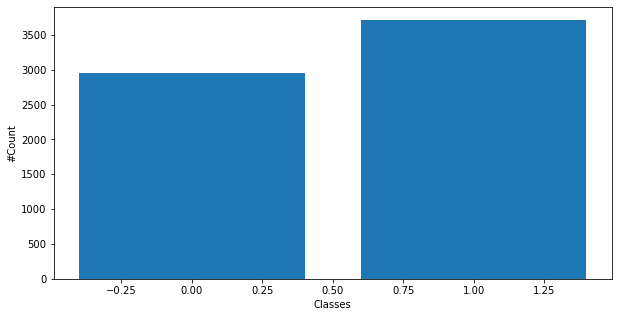

In [56]:
values, count = np.unique(y_smoteenn, return_counts=True)
plt.figure(figsize=(10,5))
plt.bar(values, count)
plt.xlabel("Classes")
plt.ylabel("#Count")

In [57]:
print(">> Ratio de la classe 0 est %.2f " %(count.min()/count.sum()))
print(">> Ratio de la classe 1 est %.2f " %(count.max()/count.sum()))

>> Ratio de la classe 0 est 0.44 
>> Ratio de la classe 1 est 0.56 


**Preprocessing dataset**

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [59]:
#scaler = MinMaxScaler()
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [60]:
# Techniques 

mode = "SMOTEENN"
#mode = "ENN"
#mode = "SMOTE"
#mode = "None"
if mode == "ENN" :
    #X_sc = scaler.fit_transform(X_enn)
    X_sc = X_enn
    y_sc = y_enn
elif mode == "SMOTE" :
    #X_sc = scaler.fit_transform(X_smote)
    X_sc = X_smote
    y_sc = y_smote
elif mode == "SMOTEENN":
    #X_sc = scaler.fit_transform(X_smoteenn)
    X_sc = X_smoteenn
    y_sc = y_smoteenn
else :
    X_sc = X
    y_sc = y

##  Model
#clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=300)
clf = SVC(C=10000, gamma='auto')
#clf = LogisticRegression()

# Evaluation the model
n_cv = 10 # nombre de cross validation
scores = cross_val_score(clf, X_sc, y_sc, cv=n_cv)
print("Test Accuracy %0.3f (%0.3f)" % (scores.mean(), scores.std()))

# predict test label
clf.fit(X_sc, y_sc)
#X_pred_sc = scaler.transform(X_pred)
X_pred_sc = X_pred

#idx = np.where(ID_pred==ID_sub)[0]

Test Accuracy 0.986 (0.034)


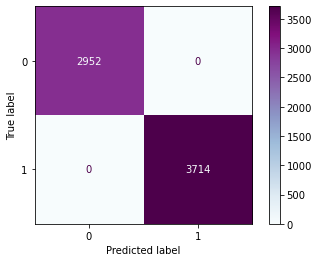

In [61]:
# Training set
y_hat=clf.predict(X_sc)
cm = confusion_matrix(y_sc, y_hat, labels=clf.classes_)
# plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='BuPu')

**Submission Set**

In [62]:
print(">> Test Accuracy %.3f" %clf.score(X_pred_sc, y_sub))

>> Test Accuracy 0.117


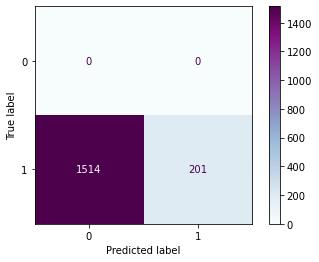

In [63]:
y_pred=clf.predict(X_pred_sc)

cm = confusion_matrix(y_sub, y_pred, labels=clf.classes_)
# plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='BuPu')

### 4 - Custom Sampling + Smote

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sc)

# Fit KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_scaled, y_sc)

n_cv = 10 # nombre de cross validation
scores = cross_val_score(knn, X_scaled, y_sc, cv=n_cv)
print("Test Accuracy %0.3f (%0.3f)" % (scores.mean(), scores.std()))

Test Accuracy 0.920 (0.012)


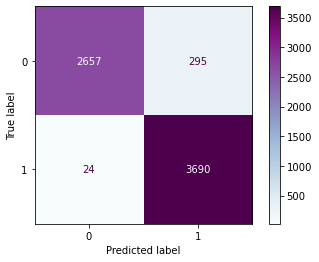

In [65]:
X_pred_sc = scaler.transform(X_pred)
# Training set
y_hat=knn.predict(X_scaled)
cm = confusion_matrix(y_sc, y_hat, labels=knn.classes_)
# plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='BuPu')

In [66]:
print(">> Test Accuracy %.3f" %knn.score(X_pred_sc, y_sub))

>> Test Accuracy 0.300


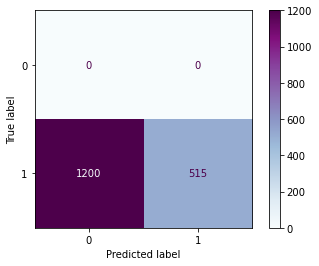

In [67]:
y_pred=knn.predict(X_pred_sc)

cm = confusion_matrix(y_sub, y_pred, labels=knn.classes_)
# plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='BuPu')